In [1]:
__author__ = "Guillermo Damke <gdamke@gmail.com>"
__version__ = 20201217

# Astroquery: Accessing online data with Astropy

"**Astroquery** is an Astropy affiliated package that contains a collection of tools to access online Astronomical data. **Each web service has its own sub-package.**"


### Installing Astropy:

To install Astropy, just run:

`conda install -c astropy astroquery`

Or, if using pip:

`pip install astroquery`

More details about Astroquery can be found at their website (for example, installing the "bleeding edge" version):

https://www.astropy.org/astroquery/

The following submodules are available in astroquery:

* ALMA Queries (astroquery.alma)
* Atomic Line List (astroquery.atomic)
* Besancon Queries (astroquery.besancon)
* Cadc (astroquery.cadc)
* CASDA Queries (astroquery.casda)
* CDS MOC Service (astroquery.cds)
* esa.hubble (astroquery.esa.hubble)
* ESASky Queries (astroquery.esasky)
* ESO Queries (astroquery.eso)
* Gaia TAP+ (astroquery.gaia)
* GAMA Queries (astroquery.gama)
* Gemini Queries (astroquery.gemini)
* HEASARC Queries (astroquery.heasarc)
* HITRAN Queries (astroquery.hitran)
* IRSA Image Server program interface (IBE) Queries (astroquery.ibe)
* IRSA Queries (astroquery.irsa)
* IRSA Dust Extinction Service Queries (astroquery.irsa_dust)
* JPL Spectroscopy Queries (astroquery.jplspec)
* MAGPIS Queries (astroquery.magpis)
* MAST Queries (astroquery.mast)
* Minor Planet Center Queries (astroquery.mpc/astroquery.solarsystem.MPC)
* NASA ADS Queries (astroquery.nasa_ads)
* NED Queries (astroquery.ned)
* NIST Queries (astroquery.nist)
* NOIRLab Queries (astroquery.noirlab)
* NRAO Queries (astroquery.nrao)
* NVAS Queries (astroquery.nvas)
* SIMBAD Queries (astroquery.simbad)
* Skyview Queries (astroquery.skyview)
* Splatalogue Queries (astroquery.splatalogue)
* SVO Filter Profile Service Queries (astroquery.svo_fps)
* UKIDSS Queries (astroquery.ukidss)
* Vamdc Queries (astroquery.vamdc)
* VizieR Queries (astroquery.vizier)
* VO Simple Cone Search (astroquery.vo_conesearch)
* VSA Queries (astroquery.vsa)
* xMatch Queries (astroquery.xmatch)
* DACE (astroquery.dace)
* xmm_newton (astroquery.esa.xmm_newton)


Which are described as:

 * Simbad: Basic data, cross-identifications, bibliography and measurements for astronomical objects outside the solar system.
 * Vizier: Set of 11,000+ published, multiwavelength catalogues hosted by the CDS.
 * ESASky: ESASky is a science driven discovery portal providing easy visualizations and full access to the entire sky as observed with ESA Space astronomy missions.
 * IRSA Image Server program interface (IBE) Query Tool: provides access to the 2MASS, WISE, and PTF image archives.
 * IRSA dust: Galactic dust reddening and extinction maps from IRAS 100 um data.
 * NED: NASA/IPAC Extragalactic Database. Multiwavelength data from both surveys and publications.
 * IRSA: NASA/IPAC Infrared Science Archive. Science products for all of NASA's infrared and sub-mm missions.
 * UKIDSS: UKIRT Infrared Deep Sky Survey. JHK images of 7500 sq deg. in the northern sky.
 * MAGPIS: Multi-Array Galactic Plane Imaging Survey. 6 and 20-cm radio images of the Galactic plane from the VLA.
 * NRAO: Science data archive of the National Radio Astronomy Observatory. VLA, JVLA, VLBA and GBT data products.
 * Besancon: Model of stellar population synthesis in the Galaxy.
 * NIST: National Institute of Standards and Technology (NIST) atomic lines database.
 * Fermi: Fermi gamma-ray telescope archive.
 * SDSS: Sloan Digital Sky Survey data, including optical images, spectra, and spectral templates.
 * Alfalfa: Arecibo Legacy Fast ALFA survey; extragalactic HI radio data.
 * SHA: Spitzer Heritage Archive; infrared data products from the Spitzer Space Telescope
 * Lamda: Leiden Atomic and Molecular Database; energy levels, radiative transitions, and collisional rates for astrophysically relevant atoms and molecules.
 * Ogle: Optical Gravitational Lensing Experiment III; information on interstellar extinction towards the Galactic bulge.
 * Splatalogue: National Radio Astronomy Observatory (NRAO)-maintained (mostly) molecular radio and millimeter line list service.
 * CosmoSim: The CosmoSim database provides results from cosmological simulations performed within different projects: the MultiDark project, the BolshoiP project, and the CLUES project.
 * ESO Archive
 * ALMA Archive
 * GAMA database
 * NVAS archive
 * Open Expolanet Catalog (OEC)

### Astroquery API specification

The `astroquery` module by itself is not very useful. To query a given service, the user has to import the respective submodule. However, all submodules follow the same APID design. We will review it first (information below taken from https://astroquery.readthedocs.io/en/latest/api.html):


The query tools will be implemented as class methods, so that the standard approach for a given web service (e.g., IRSA, UKIDSS, SIMBAD) will be

`from astroquery.service import Service`

`result = Service.query_object('M 31')`

for services that do not require login.

On the other side, if services require a login, then do:

`from astroquery.service import Service`

`S = Service(user='username',password='password')`

`result = S.query_object('M 31')`



### API Query Methods

The classes from above will have the following methods where appropriate:

* `query_object(objectname, ...)`

* `query_region(coordinate, radius=, width=)`

* `get_images(coordinate)`

They may also have other methods for querying non-standard data types (e.g., ADS queries that may return a bibtex text block).


#### `query_object`

`query_object` is only needed for services that are capable of parsing an object name (e.g., SIMBAD, Vizier, NED), otherwise `query_region` is an adequate approach, as any name can be converted to a coordinate via the SIMBAD name parser.

#### `query_region`

Query a region around a coordinate.

One of these keywords must be specified (no default is assumed):

radius - an astropy Quantity object, or a string that can be parsed into one.
        e.g., '1 degree' or 1*u.degree.
        If radius is specified, the shape is assumed to be a circle
width - a Quantity.  Specifies the edge length of a square box
height - a Quantity.  Specifies the height of a rectangular box.  Must be passed with width.

Returns a Table.

#### `get_images`

Perform a coordinate-based query to acquire images.

Returns a list of HDUList objects.

Shape keywords are optional - some query services allow searches for images that overlap with a specified coordinate.

#### `(query)_async`

Includes `get_images_async`, `query_region_async`, `query_object_async`

Same as the above query tools, but returns a *list of readable file objects* instead of a parsed object so that the data is not downloaded until result.get_data() is run.

### Common Keywords

These keywords are common to all query methods:

return_query_payload - Return the POST data that will be submitted as a dictionary
savename - [optional - see discussion below] File path to save the downloaded query to
timeout - timeout in seconds



### Asynchronous Queries

Some services require asynchronous query submission & download, e.g. Besancon, the NRAO Archive, the Fermi archive, etc. The data needs to be “staged” on the remote server before it can be downloaded. For these queries, the approach is

`result = Service.query_region_async(coordinate)`

`data = result.get_data()` 

The last line of code will periodically check whether the data is available at the specified URL.

Additionally, any service can be queried asynchronously - get_images_async will return readable objects that can be downloaded at a later time.

### Example of use:

Following the API documentation:


In [49]:
from astroquery.simbad import Simbad

result_simbad = Simbad.query_object("M 81")

In [50]:
result_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
M 81,09 55 33.1730,+69 03 55.060,12,12,0.071,0.064,90,A,R,2015AJ....150...58F


In [51]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [52]:
ra, dec = result_simbad[0]['RA', 'DEC']

### Create a coordinate object to query SDSS 

In [62]:

import astropy.units as u
from astropy import coordinates as coords

radec = f"{ra} {dec}"
radec

'09 55 33.1730 +69 03 55.060'

In [54]:
results_sdss = coords.SkyCoord( radec, frame='icrs', unit=(u.hour, u.deg))
results_sdss

<SkyCoord (ICRS): (ra, dec) in deg
    (148.88822083, 69.06529444)>

In [57]:
xid = SDSS.query_region(results_sdss, spectro=False)
xid

ra,dec,objid,run,rerun,camcol,field
float64,float64,int64,int64,int64,int64,int64
148.888054128509,69.0654048725172,1237663788501762053,4264,301,4,259


In [61]:
result_ima_sdss = SDSS.get_images(matches=xid, band=['g','r','i'])

In [63]:
result_ima_sdss

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5199d45e10>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f5199d6d510>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5199344350>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5198fe3d10>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5199d6db90>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f5198fe3c90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f51998fbfd0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5198726390>],
 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5199a481d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f5198723d90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5198d2cd50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f51995521d0>]]

In [204]:
# Each item in the list is an image:
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm

sdss_g = result_ima_sdss[1][0]
sdss_g_norm = simple_norm( sdss_g.data, stretch='log', min_percent=0.1, max_percent=99.9, log_a=500)

In [193]:
simple_norm?

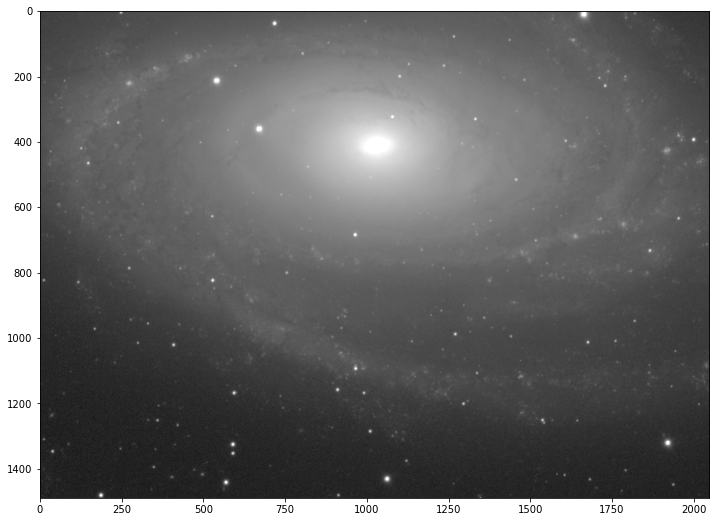

In [205]:
plt.imshow(sdss_g.data, cmap=plt.cm.gray, norm=sdss_g_norm)
fig = plt.gcf()
fig.set_size_inches((12,10))

### Another example:

In [124]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

result_simbad_m13 = Simbad.query_object("M 13")

ra_m13, dec_m13 = result_simbad_m13[0]["RA","DEC"]
coord_m13 = SkyCoord(ra=ra_m13, dec=dec_m13, unit=(u.hour, u.degree), frame='icrs')
width = u.Quantity(2.0, u.deg)
height = u.Quantity(2.0, u.deg)
results_gaia = Gaia.query_object_async(coordinate=coord_m13, width=width, height=height)
results_gaia.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
         dist              solution_id     ... epoch_photometry_url
                                           ...                     
---------------------- ------------------- ... --------------------
0.00024392285177377522 1635721458409799680 ...                     
 0.0005569315322727137 1635721458409799680 ...                     
 0.0005692399359483602 1635721458409799680 ...                     
 0.0005998278966564591 1635721458409799680 ...                     
 0.0008482881054728667 1635721458409799680 ...                     
 0.0008503062239954188 1635721458409799680 ...                     
 0.0009128520818722171 1635721458409799680 ...                     
 0.0009280984372398474 1635721458409799680 ...                     
  0.000950555861966787 1635721458409799680 ...                     
 0.0009634330321557497 1635721458409799680 ...                     
                   ...                 ... ...                  ..

In [126]:
print( results_gaia.colnames)

['dist', 'solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_f

(-100.0, 100.0)

<Figure size 432x288 with 0 Axes>

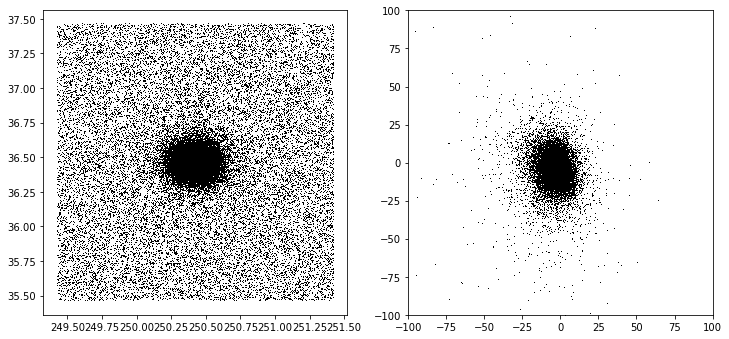

In [127]:
plt.clf()
fig, axs = plt.subplots(1,2, figsize=(12,8), subplot_kw={'aspect':'equal'})
axs[0].plot( results_gaia['ra'], results_gaia['dec'], 'k,')
axs[1].plot( results_gaia['pmra'], results_gaia['pmdec'], 'k,')
axs[1].set_xlim(-100,100)
axs[1].set_ylim(-100,100)

In [174]:

results_sdss_m13 = SDSS.query_region(coordinates=coord_m13, radius=60*u.arcmin, spectro=False, photoobj_fields=['ra','dec','u','g','r','i','z'])



In [170]:
results_sdss_m13


ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
250.325908919624,36.6554356612706,19.22115,18.267,17.9808,17.86595,17.78847
250.688430365629,36.3709016905171,23.60572,22.29293,21.69838,21.29433,21.01442
250.10981185098,36.3638031013087,25.46215,22.79269,21.1176,20.24931,20.04047
250.551937121115,36.6585149370961,22.11675,21.2736,20.45043,20.16283,20.04692
250.475063180397,36.6528943654948,19.70837,18.31083,17.86277,17.70612,17.64563
250.300480321656,36.7030466480826,26.45156,22.76818,21.85245,21.55791,22.66922
250.275975084233,36.6926636244636,19.58668,18.66258,18.42179,18.32659,18.33717
250.727961010299,36.64360171162,20.60686,18.96636,18.28177,18.05366,17.91351
250.269653306398,36.6122272568766,24.06434,23.21386,21.9806,21.43467,21.14287


<Figure size 432x288 with 0 Axes>

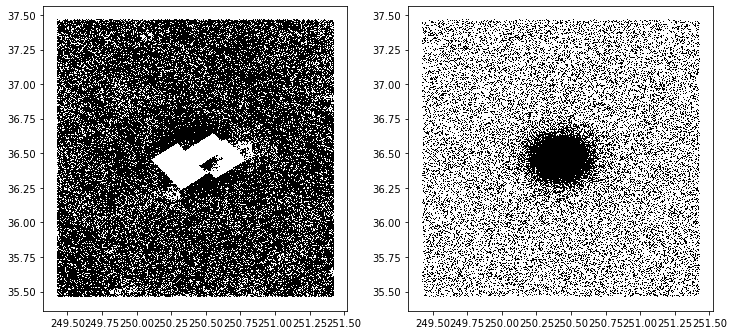

In [175]:
plt.clf()
fig, axs = plt.subplots(1,2, figsize=(12,8), sharex=True, subplot_kw={'aspect':'equal'})
axs[0].plot( results_sdss_m13['ra'], results_sdss_m13['dec'], 'k,')
axs[1].plot( results_gaia['ra'], results_gaia['dec'], 'k,')
#axs[1].set_xlim(-100,100)
#axs[1].set_ylim(-100,100)

In [177]:
len(results_sdss_m13), len(results_gaia)

(260152, 65470)

### Crossmatching

In [181]:
coords_gaia = coords.SkyCoord( results_gaia['ra'], results_gaia['dec'], frame='icrs')
coords_sdss = coords.SkyCoord( results_sdss_m13['ra']*u.deg, results_sdss_m13['dec']*u.deg, frame='icrs')

In [184]:
idx, d2d, d3d = coords_gaia.match_to_catalog_sky( coords_sdss)

In [187]:
results_sdss_m45[idx], d2d

(<Table length=65470>
        ra              dec           u        g        r        i        z    
     float64          float64      float64  float64  float64  float64  float64 
 ---------------- ---------------- -------- -------- -------- -------- --------
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 36.4095661444348  -9999.0  -9999.0  -9999.0  -9999.0  -9999.0
 250.456631804657 

### How do we make sure we got the correct match between objects?